# Support Vector Regression (SVR)

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [4]:
dataset = pd.read_csv('Data/Position_Salaries.csv')
display(dataset.head(), len(dataset))

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


10

In [5]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
## For SVR we need to have both the Features matrix and the dependent variable vector to be "vertical"
## due to this we have to reshape the Dependent variable vector
y = y.reshape(len(y),1)

## Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

check the new forms of X and y

In [8]:
print(X)
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [11]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y.ravel())

SVR()

## Predicting a new result

In [13]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1, 1))

array([[170370.0204065]])

## Visualising the SVR results

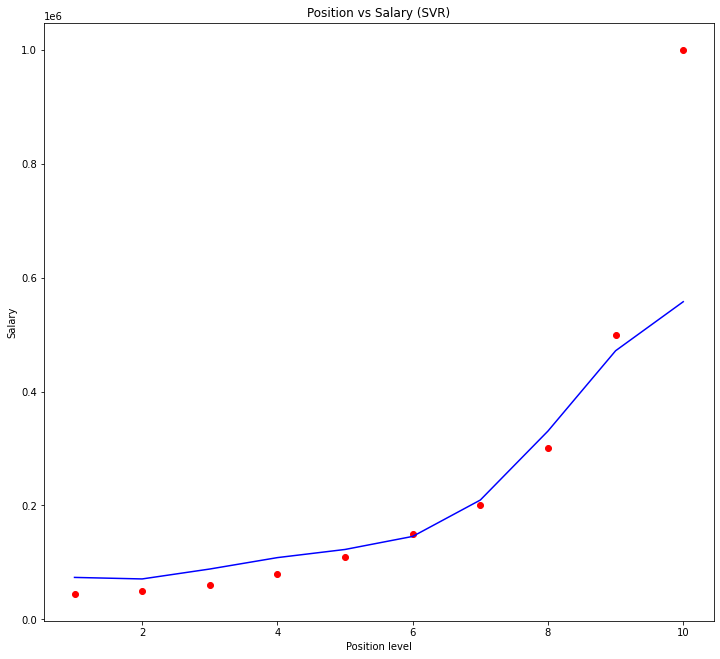

In [17]:
plt.figure(figsize = (12, 11))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1, 1)), color = 'blue')
plt.title('Position vs Salary (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

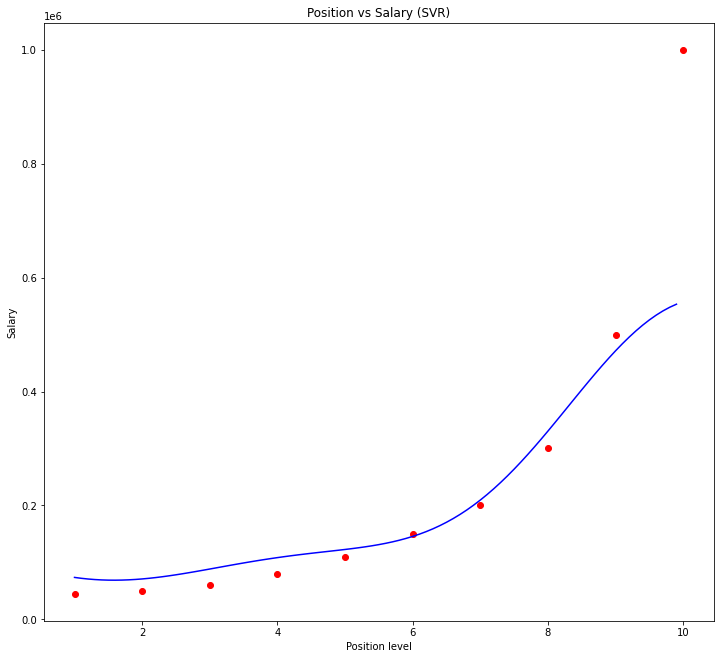

In [22]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.figure(figsize = (12, 11))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1, 1)), color = 'blue')
plt.title('Position vs Salary (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Displaying the Epsioln tube for better visual understanding

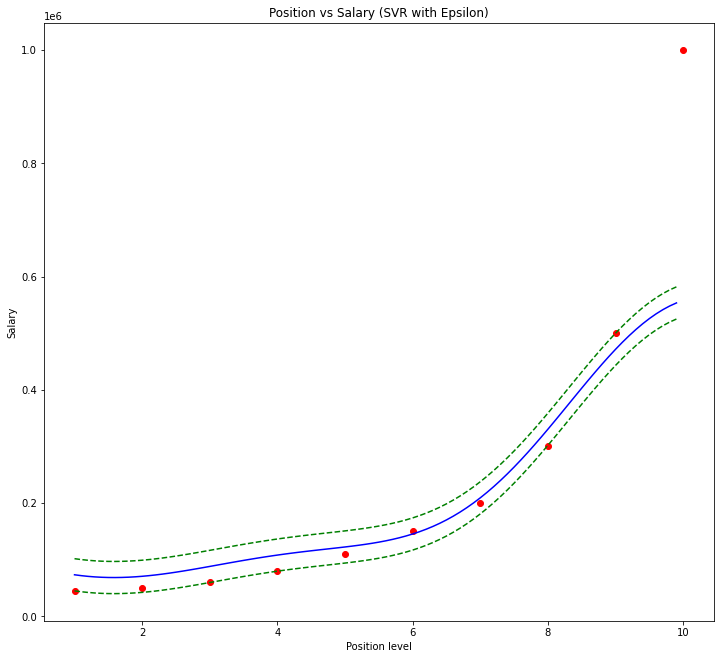

In [21]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.figure(figsize = (12, 11))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1, 1)), color = 'blue')
plt.plot(X_grid, sc_y.inverse_transform(regressor.epsilon+regressor.predict(sc_X.transform(X_grid)).reshape(-1, 1)), color = 'green', linestyle = 'dashed')
plt.plot(X_grid, sc_y.inverse_transform(-regressor.epsilon+regressor.predict(sc_X.transform(X_grid)).reshape(-1, 1)), color = 'green', linestyle = 'dashed')
plt.title('Position vs Salary (SVR with Epsilon)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()